# Chapte 7 - Input-Output Operations
입출력 작업

In [1]:
# 기본 입출력 작업 : text, ndarray, SQL
# pandas 모듈을 활용 : 상동 및 CSV, JSON을 추가적 가능
# PyTable을 사용한 입출력 : HDF5 표준을 활용한 대규모 입출력 작업

<br></br>
## 1 기본 파이썬 입출력
Input-Output Operations

### 01 Pickle 객체 저장
객체를 Disk에 저장하기

In [2]:
import numpy as np
from random import gauss

# 정규분포를 갖는 랜덤데이터를 생성한다
a = [gauss(1.5, 2) for i in range(1000000)] 

In [3]:
%time
import pickle
path = './data/'
with open(path + 'data.pkl', 'wb') as file:
    pickle.dump(a, file)

# 저장된 객체의 용량 9MB확인
# http://www.mireene.com/webimg/linux_tip1.htm  # 리눅스 기본명령어
! ls ./data/*.pkl -l

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs
-rw-rw-r-- 1 markbaum markbaum 9002006  9월  4 11:29 ./data/data.pkl


In [4]:
# 저장된 객체 불러오기
%time 
with open(path + 'data.pkl', 'rb') as file:
    b = pickle.load(file)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.1 µs


In [5]:
# a (생성), b (불러옴) 객체간 동일여부를 확인한다
np.allclose(np.array(a), np.array(b))

True

### 02 Numpy를 활용한 Pickle 객체 저장
by numpy

In [6]:
# 2개 객체를 1개의 파일에 저장하기
# np.array 모듈을 사용해서 속도가 빠르다
# 2배 데이터로, 용량도 2배가 된다
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
%time pickle.dump(np.array(a), pkl_file)  # a 객체를 np.array로 변환입력
%time pickle.dump(np.array(a) ** 2, pkl_file) # 동일데이터 제곱을 입력
pkl_file.close()

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 31.4 ms
CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 27.8 ms


In [7]:
# 다른 함수들과 같이 실행하면 syntex 오류가 발생한다 (주의!!)
! ls ./data/*.pkl -l

-rw-rw-r-- 1 markbaum markbaum 16000322  9월  4 11:29 ./data/data.pkl


In [8]:
# 2개의 np.array가 저장되었음에도 1개만 출력
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading
x = pickle.load(pkl_file)
x

array([ 1.70649082,  4.12848061,  3.39685536, ...,  3.6687107 ,
        0.24022276, -0.07239309])

In [9]:
# First In First Out
# pickle.load()를 1번더 실행해야 2번쨰 객체가 출력
# 데이터 구조를 알지 못하면 필요한 자료를 찾기 어렵다
y = pickle.load(pkl_file)
y

array([  2.91211091e+00,   1.70443521e+01,   1.15386263e+01, ...,
         1.34594382e+01,   5.77069768e-02,   5.24075991e-03])

In [10]:
pkl_file.close()

In [11]:
# {'x' : x, 'y' : y} 의 dict 객체를 통해 데이터를 모두 저장
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [12]:
# {dict} 을 통해 모든 데이터를 불러오기 가능하다
pkl_file = open(path + 'data.pkl', 'rb')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 1.70649082  4.12848061  3.39685536  3.65246595]
y [  2.91211091  17.04435214  11.53862634  13.34050748]


### 02 텍스트 파일 읽고 쓰기
Reading and Writing Text Files

In [13]:
import numpy as np
rows = 5000
a = np.random.standard_normal((rows, 5))  
a.round(4) # 소숫점 4자리서 반올림

array([[ 0.3806, -0.1565, -1.4968, -1.2179, -0.9513],
       [-0.1281,  2.016 , -0.2718, -1.7224,  1.3798],
       [-0.0967, -0.4376, -0.1043, -1.484 ,  0.4281],
       ..., 
       [-0.1536,  1.3108,  1.0434,  0.1261,  0.3519],
       [-1.6063,  0.7243, -1.3272, -1.4951,  1.44  ],
       [-0.3295,  0.7337, -1.8692,  0.4136,  0.6614]])

In [14]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [15]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [16]:
# 랜덤한 숫자와 날짜-시간 정보를 합쳐서 1줄씩 기록
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [17]:
# data.csv 저장한 파일 불러오기
csv_file = open(path + 'data.csv', 'r') 
for i in range(5): # 전체 line 중 5줄만 읽기
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,0.380571,-0.156497,-1.496833,-1.217939,-0.951262
2014-01-01 01:00:00,-0.128092,2.015992,-0.271780,-1.722366,1.379821
2014-01-01 02:00:00,-0.096663,-0.437576,-0.104265,-1.483974,0.428121
2014-01-01 03:00:00,0.175604,-0.748875,0.454243,1.755248,-1.268272


In [18]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,0.380571,-0.156497,-1.496833,-1.217939,-0.951262
2014-01-01 01:00:00,-0.128092,2.015992,-0.271780,-1.722366,1.379821
2014-01-01 02:00:00,-0.096663,-0.437576,-0.104265,-1.483974,0.428121
2014-01-01 03:00:00,0.175604,-0.748875,0.454243,1.755248,-1.268272


In [19]:
csv_file.close()

### 03 SQL 데이터베이스
sqlite3

In [20]:
# DB와 연결을 설정
import sqlite3
con = sqlite3.connect(path + 'number.db')

# Query 문 지정 및 실행
query = 'Create Table numbs (Date date, No1 real, No2 real)'
con.execute(query)   # execute : 명령입력
con.commit()         # commit  : 입력시행 (범하다)

In [21]:
# input 01 : 테이블에 데이터 추가하기 : 1 줄 추가
import datetime
con.execute('Insert Into numbs  values(?,?,?)', (datetime.datetime.now(), 0.12, 7.3))

In [22]:
# input 02 : 10,000개 데이터를 생성후 입력하기
data = np.random.standard_normal((10000, 2)).round(5)
print(data.shape)
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (datetime.datetime.now(), row[0], row[1]))
con.commit()

(10000, 2)


In [23]:
# load 01 : 저장한 데이터 불러오기
con.execute('SELECT * FROM numbs').fetchmany(4)

[('2017-09-04 11:29:29.815855', 0.12, 7.3),
 ('2017-09-04 11:29:29.823753', 1.21111, 0.86575),
 ('2017-09-04 11:29:29.823826', 0.31321, -1.06475),
 ('2017-09-04 11:29:29.823840', -1.77909, -1.54526)]

In [24]:
# load 02 : 한번에 특정 column 만 호출
pointer = con.execute('SELECT   Date, No2   FROM numbs')
for i in range(3):
    print(pointer.fetchone())

('2017-09-04 11:29:29.815855', 7.3)
('2017-09-04 11:29:29.823753', 0.86575)
('2017-09-04 11:29:29.823826', -1.06475)


In [25]:
con.close()
!rm ./data/number.db

### 03 Numpy 활용, 자료형 정의하기
numpy 의 dtype를 지정하면 Sqlite의 자료형 변환의 수고를 덜어준다

In [26]:
# 필드별 데이터타입 정의하기
import numpy as np
# 날짜데이터로 기준 index 생성하기
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # 분 단위로 index를 생성 (minute intervals)
len(dtimes)

3681360

In [27]:
np.zeros([4,4])

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [28]:
d_ty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
# zero array 생성 (datetime의 0을 입력하니까, 모든 데이터가 1970-1-1로 치환되어 입력)
# 전체 3컬럼 중, 첫번쨰 컬럼에 내용이 삽입
data = np.zeros(len(dtimes), dtype = d_ty); data 

array([('1970-01-01T00:00',  0.,  0.), ('1970-01-01T00:00',  0.,  0.),
       ('1970-01-01T00:00',  0.,  0.), ..., ('1970-01-01T00:00',  0.,  0.),
       ('1970-01-01T00:00',  0.,  0.), ('1970-01-01T00:00',  0.,  0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [29]:
# zero 데이터 영역에 dtime 객체로 치환
data['Date'] = dtimes; data

array([('2015-01-01T10:00',  0.,  0.), ('2015-01-01T10:01',  0.,  0.),
       ('2015-01-01T10:02',  0.,  0.), ..., ('2021-12-31T21:57',  0.,  0.),
       ('2021-12-31T21:58',  0.,  0.), ('2021-12-31T21:59',  0.,  0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [30]:
# 기타 column 데이터 입력하기
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0] # 생성한 난수의 0 컬럼을 No1에 입력
data['No2'] = a[:, 1] # 생성한 난수의 1 컬럼을 No1에 입력
data

array([('2015-01-01T10:00', -0.99307001,  0.60544002),
       ('2015-01-01T10:01',  0.59921002, -0.22319999),
       ('2015-01-01T10:02', -2.08380008, -1.64101005), ...,
       ('2021-12-31T21:57', -0.46145999,  1.37346995),
       ('2021-12-31T21:58', -0.91083997,  1.70670998),
       ('2021-12-31T21:59', -0.1596    ,  0.22825   )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [43]:
# 59Mb 임에도 속도가 빠르다
%time np.save(path + 'array', data)  # array .npy 로 저장된다
!ls ./data/*.npy -l

CPU times: user 4 ms, sys: 44 ms, total: 48 ms
Wall time: 45.9 ms
-rw-rw-r-- 1 markbaum markbaum 58901888  9월  4 11:32 ./data/array.npy


In [44]:
# numpy 객체 불러오기
%time np.load(path + 'array.npy')

CPU times: user 0 ns, sys: 16 ms, total: 16 ms
Wall time: 14.7 ms


array([('2015-01-01T10:00', -0.99307001,  0.60544002),
       ('2015-01-01T10:01',  0.59921002, -0.22319999),
       ('2015-01-01T10:02', -2.08380008, -1.64101005), ...,
       ('2021-12-31T21:57', -0.46145999,  1.37346995),
       ('2021-12-31T21:58', -0.91083997,  1.70670998),
       ('2021-12-31T21:59', -0.1596    ,  0.22825   )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [46]:
# 대용량 데이터 저장 및 불러오기
# 거의 시스템 속도만큼 즉각 저장이 가능하다 
data = np.random.standard_normal((1000, 6000))
%time np.save(path + 'array_big', data)
!ls ./data/*.npy -l

CPU times: user 4 ms, sys: 20 ms, total: 24 ms
Wall time: 22.1 ms
-rw-rw-r-- 1 markbaum markbaum 58901888  9월  4 11:32 ./data/array.npy
-rw-rw-r-- 1 markbaum markbaum 48000080  9월  4 11:36 ./data/array_big.npy


In [47]:
! rm ./data/*.npy
# 결론
# pickle 및 SQL 보다 더 속도가 빠른반면, SQL의 기능을 활용할 수 없다
# SQL기능을 보완가능한 Pandas (Pytable 라이브러리)를 활용하면 유용하다

<br></br>
## 2 pandas 를 활용한 사용자 입출력
pandas 라이브러리

In [ ]:
# http://pandas.pydata.org/pandas-docs/version/0.20/io.html
# <ty>  <format>    <read>          <write>
# text  CSV         read_csv        to_csv
# text 	JSON    	read_json   	to_json
# text 	HTML    	read_html   	to_html
# text 	Localclips 	read_clipboard 	to_clipboard
# binary MS Excel 	read_excel 	    to_excel
# binary HDF5       read_hdf 	    to_hdf
# binary Feather    read_feather    to_feather
# binary Msgpack 	read_msgpack    to_msgpack
# binary Stata      read_stata      to_stata
# binary SAS        read_sas 
# binary Pickle     read_pickle     to_pickle
# SQL    SQL        read_sql        to_sql
# SQL    Gogl Query read_gbq        to_gbq

### 01 SQL 데이터베이스
Sqlite3 데이터베이스

In [48]:
# numpy로 객체 생성하기
import pandas as pd
filename = path + 'numbs'
filename

'./data/numbs'

### 02 Numpy 활용, 자료형 정의하기
numpy 의 dtype를 지정하면 Sqlite의 자료형 변환의 수고를 덜어준다

In [51]:
# DB와 table 만들기
import sqlite3
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'
con = sqlite3.Connection(filename + '.db')
con.execute(query)

In [54]:
# %%time             # 셀의 실행시간 계산
# con.executemany() 데이터 전체입력함수
import numpy as np
data = np.random.standard_normal((1000000, 5)).round(5)
%time con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 6.52 s, sys: 40 ms, total: 6.56 s
Wall time: 6.58 s


In [55]:
!ls ./data/*.db -l

-rw-r--r-- 1 markbaum markbaum 158552064  9월  4 12:01 ./data/numbs.db


In [59]:
%%time
# SQlite3 객체를 numpy로 불러오기
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])  # 전체 데이터 불러온 뒤 index 2까지 출력
temp = 0.0

[(0.69656, -0.16083, -0.35156, 0.69569, -1.03612), (0.71939, -0.04034, 1.45961, 0.10254, -1.21528)]
CPU times: user 3.63 s, sys: 204 ms, total: 3.83 s
Wall time: 3.87 s


In [70]:
%%time
# query 조건으로 축약해서 불러오기
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 1.34 s, sys: 88 ms, total: 1.42 s
Wall time: 1.42 s


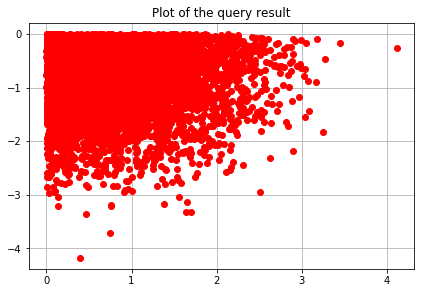

In [71]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.tight_layout() #plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
plt.title('Plot of the query result'); plt.show()

### 03 SQL에서 Pandas로 
SQL의 query 결과를 pandas로 변환하기

In [ ]:
filename = path + 'numbs'
con = sqlite3.Connection(filename + '.db')

In [75]:
# import pandas.io.sql as pds
# %time data = pds.read_sql('SELECT * FROM numbers', con)
import pandas as pd
%time data1 = pd.read_sql('SELECT * FROM numbers', con)
data.head()

CPU times: user 4.37 s, sys: 204 ms, total: 4.57 s
Wall time: 4.57 s


,No1,No2,No3,No4,No5
0,0.69656,-0.16083,-0.35156,0.69569,-1.03612
1,0.71939,-0.04034,1.45961,0.10254,-1.21528
2,-1.40935,1.35670,0.58194,0.36640,-0.69994
3,-0.29410,0.50784,2.00188,-0.53286,1.91960
4,0.26852,-1.48763,-0.50525,1.74496,0.20267


In [76]:
# 메모리에 업로드후 작업시 빠르게 작업이 가능
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 37.5 ms


,No1,No2,No3,No4,No5
0,0.69656,-0.16083,-0.35156,0.69569,-1.03612
1,0.71939,-0.04034,1.45961,0.10254,-1.21528
4,0.26852,-1.48763,-0.50525,1.74496,0.20267
7,0.02893,-0.05963,-0.74074,0.10557,1.29539
8,0.06583,-0.97360,-1.33696,-0.87478,-1.28015


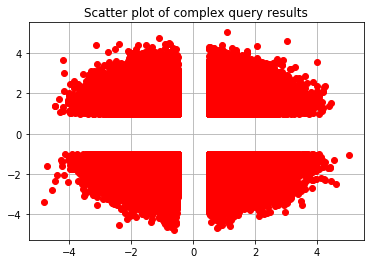

CPU times: user 1.91 s, sys: 348 ms, total: 2.26 s
Wall time: 1.86 s


In [80]:
%%time
res = data[['No1', 'No2']][ ((data['No1'] > 0.5) | (data['No1'] < -0.5))
            & ((data['No2'] < -1) | (data['No2'] > 1))]

plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
plt.title('Scatter plot of complex query results');plt.show()

### 04 HDFS를 pandas 에서
pd.HDFStore()

In [81]:
# SQL과 같은 데이터를 HDFS로 저장
# 속도가 SQL보다 더 빠르다
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data
h5s
h5s.close()

CPU times: user 56 ms, sys: 76 ms, total: 132 ms
Wall time: 131 ms


In [82]:
%%time
# HDFS로 읽기
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

CPU times: user 0 ns, sys: 36 ms, total: 36 ms
Wall time: 41.4 ms


In [83]:
# 저장자료와 읽은자료 동질성 확인
np.allclose(np.array(temp), np.array(data))

True

In [84]:
# h5s가 10% 더 작은 용량을 갖는다
!ls ./data/ -l

합계 321128
-rw-rw-r-- 1 markbaum markbaum    337582  9월  4 11:29 data.csv
-rw-rw-r-- 1 markbaum markbaum  16000267  9월  4 11:29 data.pkl
-rw-rw-r-- 1 markbaum markbaum    688500  8월 31 11:29 es.txt
-rw-rw-r-- 1 markbaum markbaum    531406  8월 31 13:45 es50.txt
-rw-r--r-- 1 markbaum markbaum 158552064  9월  4 12:01 numbs.db
-rw-rw-r-- 1 markbaum markbaum 144007192  9월  4 13:23 numbs.h5s
drwx------ 6 markbaum markbaum      4096  7월 12 03:24 py4fi-master
-rw-rw-r-- 1 markbaum markbaum    363485  8월 31 11:30 vs.txt
-rw-rw-r-- 1 markbaum markbaum   1102776  7월 12 03:24 vstoxx_data_31032014.h5
-rw-rw-r-- 1 markbaum markbaum   2416542  7월 12 03:24 vstoxx_march_2014.h5
-rw-rw-r-- 1 markbaum markbaum   4806862  7월 12 03:24 vstoxx_march_2014.xlsx


### 05 CSV로 저장
Data as CSV File

In [85]:
%time data.to_csv(filename + '.csv')

CPU times: user 25.4 s, sys: 288 ms, total: 25.7 s
Wall time: 25.8 s


In [86]:
# h5s가 10% 더 작은 용량을 갖는다
!ls ./data/ -l

합계 466360
-rw-rw-r-- 1 markbaum markbaum    337582  9월  4 11:29 data.csv
-rw-rw-r-- 1 markbaum markbaum  16000267  9월  4 11:29 data.pkl
-rw-rw-r-- 1 markbaum markbaum    688500  8월 31 11:29 es.txt
-rw-rw-r-- 1 markbaum markbaum    531406  8월 31 13:45 es50.txt
-rw-rw-r-- 1 markbaum markbaum 148715170  9월  4 13:29 numbs.csv
-rw-r--r-- 1 markbaum markbaum 158552064  9월  4 12:01 numbs.db
-rw-rw-r-- 1 markbaum markbaum 144007192  9월  4 13:23 numbs.h5s
drwx------ 6 markbaum markbaum      4096  7월 12 03:24 py4fi-master
-rw-rw-r-- 1 markbaum markbaum    363485  8월 31 11:30 vs.txt
-rw-rw-r-- 1 markbaum markbaum   1102776  7월 12 03:24 vstoxx_data_31032014.h5
-rw-rw-r-- 1 markbaum markbaum   2416542  7월 12 03:24 vstoxx_march_2014.h5
-rw-rw-r-- 1 markbaum markbaum   4806862  7월 12 03:24 vstoxx_march_2014.xlsx


CPU times: user 2 s, sys: 56 ms, total: 2.06 s
Wall time: 2.06 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa31f910160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa31f97f400>]], dtype=object)

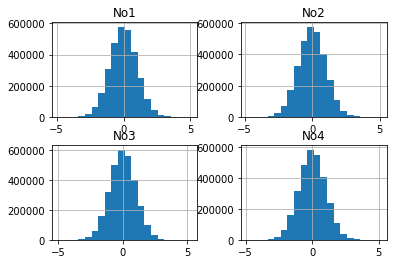

In [87]:
%%time
# bins = 20 : 구간을 20단계로 나눈다
pd.read_csv(filename + '.csv')[['No1', 'No2','No3', 'No4']].hist(bins = 20)

### 06 Excel 로 저장
Data as Excel File

In [88]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 16.6 s, sys: 108 ms, total: 16.7 s
Wall time: 16.7 s


CPU times: user 5.41 s, sys: 12 ms, total: 5.42 s
Wall time: 5.44 s


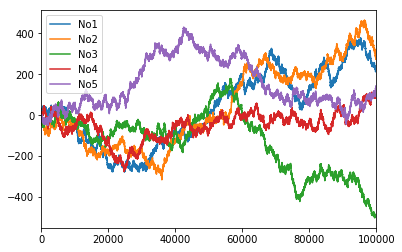

In [89]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# title: Paths of random data from Excel file

In [90]:
!ls ./data/ -l

합계 470632
-rw-rw-r-- 1 markbaum markbaum    337582  9월  4 11:29 data.csv
-rw-rw-r-- 1 markbaum markbaum  16000267  9월  4 11:29 data.pkl
-rw-rw-r-- 1 markbaum markbaum    688500  8월 31 11:29 es.txt
-rw-rw-r-- 1 markbaum markbaum    531406  8월 31 13:45 es50.txt
-rw-rw-r-- 1 markbaum markbaum 148715170  9월  4 13:29 numbs.csv
-rw-r--r-- 1 markbaum markbaum 158552064  9월  4 12:01 numbs.db
-rw-rw-r-- 1 markbaum markbaum 144007192  9월  4 13:23 numbs.h5s
-rw-rw-r-- 1 markbaum markbaum   4371224  9월  4 13:33 numbs.xlsx
drwx------ 6 markbaum markbaum      4096  7월 12 03:24 py4fi-master
-rw-rw-r-- 1 markbaum markbaum    363485  8월 31 11:30 vs.txt
-rw-rw-r-- 1 markbaum markbaum   1102776  7월 12 03:24 vstoxx_data_31032014.h5
-rw-rw-r-- 1 markbaum markbaum   2416542  7월 12 03:24 vstoxx_march_2014.h5
-rw-rw-r-- 1 markbaum markbaum   4806862  7월 12 03:24 vstoxx_march_2014.xlsx


In [ ]:
# 결론
# Excel은 일부분만 저정함에도 시간이 상당소요
# HDFS 형식이 가장 용량이 작고 효율적이다
# Csv는 가장 용량이 큰데, 이는 메모리 과다점유로 인한 성능둔화 원인이 된다

<br></br>
## 3 PyTable를 활용한 고속 입출력 
HDFS를 활용한 입출력 연산 성능 최적화 (Fast I/O with PyTables)

In [91]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### 01 Table 만들기
PyTable

In [100]:
# filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')
rows = 2000000
row_des = { 'Date': tb.StringCol(26, pos=1), # 26글자 String
            'No1': tb.IntCol(pos=2),         # 정수열 1
            'No2': tb.IntCol(pos=3),         # 정수열 2
            'No3': tb.Float64Col(pos=4),     # 부동소숫점(소숫점 4자리)
            'No4': tb.Float64Col(pos=5)}     # 부동소숫점(소숫점 5자리)

In [101]:
# 압축하지 않은 테이터 저장방식을 활용
filters = tb.Filters(complevel = 0)
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [ ]:
pointer = tab.row
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [106]:
%%time
for i in range(rows): # for 반복문으로, 데이터를 입력한다
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
tab.flush()          # HDFS의 commit 명령

CPU times: user 6.28 s, sys: 40 ms, total: 6.32 s
Wall time: 6.33 s


In [107]:
# 입력한 객체의 내용 확인 : ndarray와 비슷하게 출력
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [108]:
# HDSF를 담을 Zeros 생성
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)
sarray

array([(b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       ..., (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       (b'', 0, 0,  0.,  0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [109]:
%%time
# HDFS객체 옮겨 담기 : 순식간에 처리가 완료된다
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 58.9 ms


In [110]:
# np.array --> table 생성하기
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title = 'Integers and Floats',
                      expectedrows = rows, filters = filters)

/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [111]:
# 중복된 테이블은 삭제한다
h5.remove_node('/', 'ints_floats_from_array')

### 02 Table 활용하기
PyTable

In [112]:
# 객체를 slice 로 접근하기
tab[:3]

array([(b'2017-09-04 14:42:07.211879', 5233, 7296, -0.2709 , -0.15859),
       (b'2017-09-04 14:42:07.211915', 8828, 6078,  1.39352, -0.24489),
       (b'2017-09-04 14:42:07.211920', 3349, 7951, -1.01049, -0.37965)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [113]:
# 객체를 slice 로 접근하기
tab[:3]['No4']

array([-0.15859, -0.24489, -0.37965])

In [114]:
# numpy의 유니버셜 함수를 바로 적용가능
# No3 컬럼의 총합
%time np.sum(tab[:]['No3'])

CPU times: user 28 ms, sys: 24 ms, total: 52 ms
Wall time: 48.6 ms


-1598.3723099999997

In [115]:
# No1 컬럼의 편차 총합
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 36 ms, sys: 16 ms, total: 52 ms
Wall time: 50.6 ms


133303920.42162623

2000000
CPU times: user 144 ms, sys: 64 ms, total: 208 ms
Wall time: 206 ms


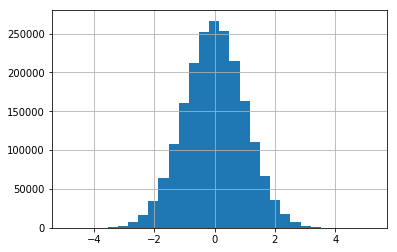

In [116]:
%%time
# table 객체를 plot으로 시각화
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))

CPU times: user 304 ms, sys: 28 ms, total: 332 ms
Wall time: 300 ms


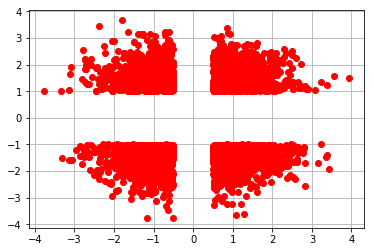

In [119]:
%%time
# table 객체를 Query 문으로 데이터 선별하기
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [120]:
%%time
# query문 연산하기
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

(9904, 4860)
(159, 4668)
(60, 5058)
(9946, 4669)
CPU times: user 72 ms, sys: 8 ms, total: 80 ms
Wall time: 60 ms


In [121]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print(res)

(1234, 9954)
(1234, 9898)
(1234, 9796)
(1234, 9982)
(1234, 9971)
CPU times: user 28 ms, sys: 28 ms, total: 56 ms
Wall time: 49.5 ms


### 03 압축된 Table 다루기
Working with Compressed Tables

In [122]:
# 4단계 압축을 실시해도 속도 차이는 거의 없다
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w')

filters = tb.Filters(complevel=4, complib = 'blosc')

tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title = 'Integers and Floats',
                        expectedrows = rows, filters = filters)

In [123]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]
# 살짝 느린 결과값을 출력

CPU times: user 256 ms, sys: 28 ms, total: 284 ms
Wall time: 255 ms


In [124]:
%time arr_non = tab.read()

CPU times: user 16 ms, sys: 28 ms, total: 44 ms
Wall time: 39.7 ms


In [125]:
# 저장 및 읽기 시간은 좀 걸리지만, 50% 용량이 절약된다
%time arr_com = tabc.read()
h5c.close()

!ls ./data/ -l

CPU times: user 20 ms, sys: 24 ms, total: 44 ms
Wall time: 43.5 ms
합계 763944
-rw-rw-r-- 1 markbaum markbaum    337582  9월  4 11:29 data.csv
-rw-rw-r-- 1 markbaum markbaum  16000267  9월  4 11:29 data.pkl
-rw-rw-r-- 1 markbaum markbaum    688500  8월 31 11:29 es.txt
-rw-rw-r-- 1 markbaum markbaum    531406  8월 31 13:45 es50.txt
-rw-rw-r-- 1 markbaum markbaum 148715170  9월  4 13:29 numbs.csv
-rw-r--r-- 1 markbaum markbaum 158552064  9월  4 12:01 numbs.db
-rw-rw-r-- 1 markbaum markbaum 144007192  9월  4 13:23 numbs.h5s
-rw-rw-r-- 1 markbaum markbaum   4371224  9월  4 13:33 numbs.xlsx
drwx------ 6 markbaum markbaum      4096  7월 12 03:24 py4fi-master
-rw-rw-r-- 1 markbaum markbaum 200312336  9월  4 14:53 tab.h5
-rw-rw-r-- 1 markbaum markbaum 100030831  9월  4 15:01 tab.h5c
-rw-rw-r-- 1 markbaum markbaum    363485  8월 31 11:30 vs.txt
-rw-rw-r-- 1 markbaum markbaum   1102776  7월 12 03:24 vstoxx_data_31032014.h5
-rw-rw-r-- 1 markbaum markbaum   2416542  7월 12 03:24 vstoxx_march_2014.h5
-rw-rw-r-- 1 

### 04 배열 Table 다루기
Working with Arrays

In [126]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: user 4 ms, sys: 36 ms, total: 40 ms
Wall time: 39.4 ms


In [127]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [128]:
h5.close()
# HDF5 기반의 자료형
# 관계형 DB에서 대용품으로 활용에 적합하다
# pandas와 결합하면 최적의 성능 및 용량을 발휘가능하다

### 05 Out of Memory 연산
본인의 메모리보다 더 큰 자료를 다룰 수 있다

In [134]:
# filename = path + 'array.h5'
# h5 = tb.open_file(filename, 'w') 

# n = 1000
# ear = h5.create_earray( h5.root, 'ear', 
#                         atom = tb.Float64Atom(),
#                         shape = (0, n))

In [136]:
# %%time
# rand = np.random.standard_normal((n, n))
# for i in range(750):
#     ear.append(rand)
# ear.flush()

CPU times: user 6.94 s, sys: 7.56 s, total: 14.5 s
Wall time: 43.6 s


In [138]:
# ear

/ear (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [137]:
# # 총 6gb 데이터가 생성
# ear.size_on_disk

6000000000

In [139]:
# out = h5.create_earray(h5.root, 'out',
#                       atom=tb.Float64Atom(),
#                       shape=(0, n))

In [141]:
# # Earray객체 : numexpr 라이브러리에 기반한 수치표현식
# # 전체 연산이 메모리 밖에서 이루어 진다

# # 수치 표현식을 문자열로 입력
# expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
# # 결과를 저장할 디스크 기반의 배열 설정
# expr.set_output(out, append_mode=True)
# # 수치표현식을 실제로 계산후 디스크 기반의 배열에 저장
# %time expr.eval()

CPU times: user 1min 32s, sys: 13.6 s, total: 1min 46s
Wall time: 1min 28s


/out (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [144]:
# # 위의 같은 작업을 메모리에서 작업
# %time imarray = ear.read()
# import numexpr as ne
# expr = '3 * sin(imarray) + sqrt(abs(imarray))'
# ne.set_num_threads(16)
# %time ne.evaluate(expr)[0, :10]

In [143]:
# h5.close()